In [1]:
print("jai mata di..")

jai mata di..


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('loandatabase.csv')
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df1=df.dropna()
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
df2=df1.copy()
df2.head(2)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [8]:
df2.Loan_Amount_Term.unique()
df2['Loan_Amount_Term'].dtypes

dtype('float64')

In [9]:
df2.Loan_Amount_Term.unique()

array([360., 120., 180.,  60., 300., 480., 240.,  36.,  84.])

In [10]:
df2['Loan_Amount_Term']=df2['Loan_Amount_Term'].astype(int)

In [11]:
df3=df2.copy()
df3.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360,1.0,Urban,Y


In [12]:
def months_to_years(x):
    years=x/12
    return years 

In [13]:
df3['Loan_Amount_Term_in_years']=df3['Loan_Amount_Term'].apply(months_to_years)

In [14]:
df3['Loan_Amount_Term_in_years']=df3['Loan_Amount_Term_in_years'].astype(int)
df3.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Amount_Term_in_years
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360,1.0,Rural,N,30


In [15]:
df3.Loan_Amount_Term_in_years.unique()

array([30, 10, 15,  5, 25, 40, 20,  3,  7])

In [16]:
def loan_type(x):
    if x>10:
        return 'home loan' 
    if x==3:
        return 'personal loan'
    if x==5:
        return 'vechicle loan'
    else:
        return 'buisness loan'

In [17]:
df4=df3.copy()

In [18]:
df4['Loan_type']=df3['Loan_Amount_Term_in_years'].apply(loan_type)

In [19]:
df4.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Amount_Term_in_years,Loan_type
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360,1.0,Rural,N,30,home loan
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360,1.0,Urban,Y,30,home loan
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360,1.0,Urban,Y,30,home loan


In [20]:
df4.Loan_type.unique()

array(['home loan', 'buisness loan', 'vechicle loan', 'personal loan'],
      dtype=object)

In [21]:
df5=df4.copy()

In [22]:
def interest_per_annum(Loan_type,LoanAmount):
    if Loan_type=='home loan':
        return ((LoanAmount*12)/100)
    if Loan_type=='vechicle loan':
        return ((LoanAmount*8)/100)
    if Loan_type=='buisness loan':
        return ((LoanAmount*18)/100)
    if Loan_type=='personal loan':
        return ((LoanAmount*24)/100)

In [23]:
df5['interest_rate']=df5.apply(lambda row: interest_per_annum (row['Loan_type'],row['LoanAmount']),axis=1)
df5.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Amount_Term_in_years,Loan_type,interest_rate
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360,1.0,Rural,N,30,home loan,15.36
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360,1.0,Urban,Y,30,home loan,7.92
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360,1.0,Urban,Y,30,home loan,14.40


In [24]:
df5['Loan_Status'].value_counts()

Y    332
N    148
Name: Loan_Status, dtype: int64

<AxesSubplot: >

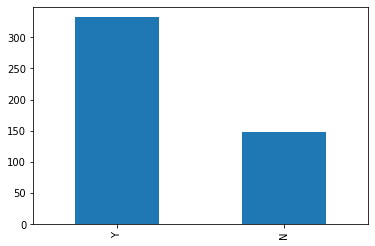

In [25]:
df5['Loan_Status'].value_counts(normalize=True)
df5['Loan_Status'].value_counts().plot.bar()

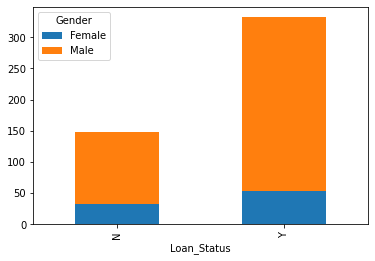

In [26]:
grouped=df5.groupby(['Loan_Status','Gender']).size().unstack()
grouped.plot(kind='bar',stacked=True)
plt.show()

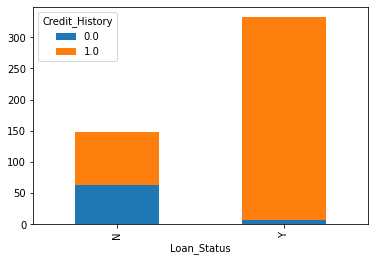

In [27]:
grouped=df5.groupby(['Loan_Status','Credit_History']).size().unstack()
grouped.plot(kind='bar',stacked=True)
plt.show()

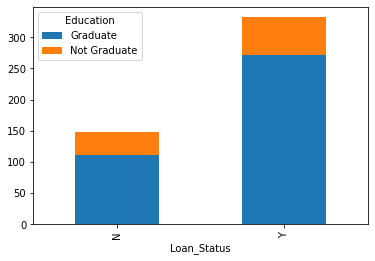

In [28]:
grouped3=df5.groupby(['Loan_Status','Education']).size().unstack()
grouped3.plot(kind='bar',stacked=True)
plt.show()

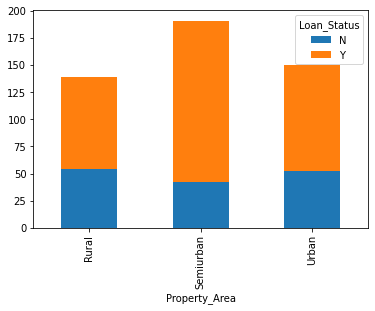

In [29]:
grouped2=df5.groupby(['Property_Area','Loan_Status']).size().unstack()
grouped2.plot(kind='bar',stacked=True)
plt.show()

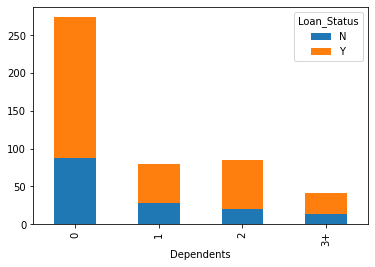

In [30]:
grouped1=df5.groupby(['Dependents','Loan_Status']).size().unstack()
grouped1.plot(kind='bar',stacked=True)
plt.show()

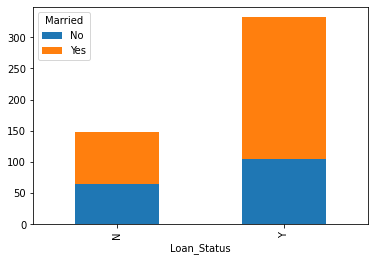

In [31]:
grouped=df5.groupby(['Loan_Status','Married']).size().unstack()
grouped.plot(kind='bar',stacked=True)
plt.show()

In [32]:
df6=df5.copy()
df6['Loan_Status']=df5['Loan_Status'].replace({'Y':1,'N':0})
df6['Dependents']=df5['Dependents'].replace({'3+':3})
df6.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Amount_Term_in_years,Loan_type,interest_rate
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360,1.0,Rural,0,30,home loan,15.36
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360,1.0,Urban,1,30,home loan,7.92


C:\Users\A2ZCON~1\AppData\Local\Temp/ipykernel_6760/4187866370.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df6[cols].corr()


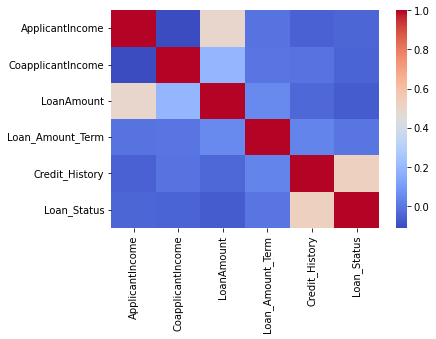

In [33]:
cols=['Gender','Married','Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']
corr=df6[cols].corr()
sns.heatmap(corr,cmap='coolwarm')
plt.show()

C:\Users\A2ZCON~1\AppData\Local\Temp/ipykernel_6760/2068636356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df6['ApplicantIncome'])


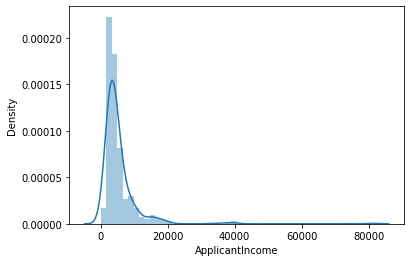

<AxesSubplot: >

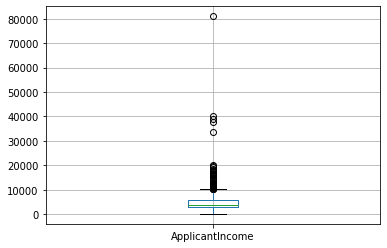

In [34]:
sns.distplot(df6['ApplicantIncome'])
plt.show()
df6.boxplot("ApplicantIncome")

C:\Users\A2ZCON~1\AppData\Local\Temp/ipykernel_6760/2995476129.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df6['CoapplicantIncome'])


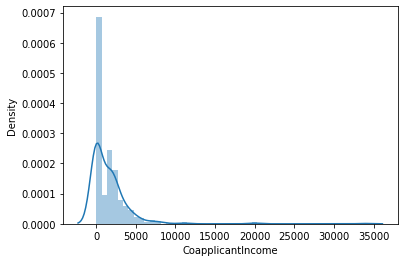

<AxesSubplot: >

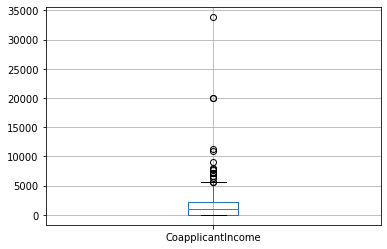

In [35]:
sns.distplot(df6['CoapplicantIncome'])
plt.show()
df6.boxplot("CoapplicantIncome")


In [36]:
df7=df6.copy()

C:\Users\A2ZCON~1\AppData\Local\Temp/ipykernel_6760/4000296929.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df7['ApplicantIncome_log'])


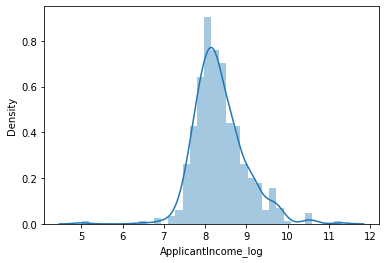

In [37]:
df7["ApplicantIncome_log"]=np.log(df6["ApplicantIncome"])
sns.distplot(df7['ApplicantIncome_log'])
plt.show()

C:\Users\A2ZCON~1\AppData\Local\Temp/ipykernel_6760/3872165073.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df7['LoanAmount'])


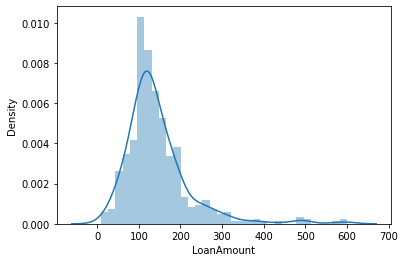

<AxesSubplot: >

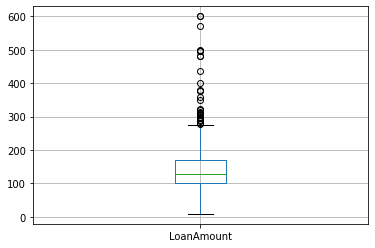

In [38]:

sns.distplot(df7['LoanAmount'])
plt.show()
df7.boxplot("LoanAmount")

C:\Users\A2ZCON~1\AppData\Local\Temp/ipykernel_6760/1672501493.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df7['LoanAmount_log'])


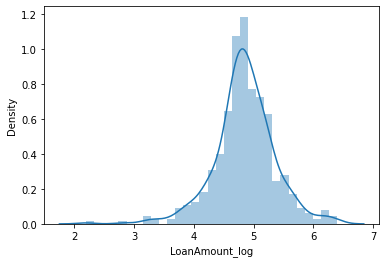

In [39]:
df7["LoanAmount_log"]=np.log(df6["LoanAmount"])
sns.distplot(df7['LoanAmount_log'])
plt.show()

In [40]:
df8=df7.copy()
df8.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Amount_Term_in_years,Loan_type,interest_rate,ApplicantIncome_log,LoanAmount_log
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360,1.0,Rural,0,30,home loan,15.36,8.430109,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360,1.0,Urban,1,30,home loan,7.92,8.006368,4.189655


In [41]:
df8=df8.drop("interest_rate",axis=1)

df8.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Amount_Term_in_years,Loan_type,ApplicantIncome_log,LoanAmount_log
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360,1.0,Rural,0,30,home loan,8.430109,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360,1.0,Urban,1,30,home loan,8.006368,4.189655


In [42]:

df8=df8.drop("Loan_Amount_Term_in_years",axis=1)
df8=df8.drop("Loan_type",axis=1)
df8=df8.drop("ApplicantIncome_log",axis=1)

df8=df8.drop("LoanAmount_log",axis=1)

In [43]:
df8.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360,1.0,Urban,1


In [44]:
Y=df8.Loan_Status
Y.head(2)

1    0
2    1
Name: Loan_Status, dtype: int64

In [45]:
df9=df8.copy()
df9=df9.drop('Loan_Status',axis=1)
df9=df9.drop('Loan_ID',axis=1)
df9.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360,1.0,Urban


In [46]:
X=df9[['ApplicantIncome','Credit_History']]

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [48]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X_train,Y_train)
LogisticRegression()

LogisticRegression()

In [49]:
new_data=[[1000000,0]]
prediction=model.predict(new_data)
print(prediction)

[1]


c:\Users\a2z control\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [50]:
Y_pred=model.predict(X_test)

In [51]:
print('ACCURACY : ',accuracy_score(Y_test,Y_pred))

ACCURACY :  0.8229166666666666


In [52]:
print(Y_pred)

[1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [53]:
#---------------------------------------------------    DECISION TREE    -----------------------------------------------------------------

In [55]:
df10=df7.copy()

In [56]:
df10['Gender']=df10['Gender'].replace({'Male':0,'Female':1})
df10['Married']=df10['Married'].replace({'Yes':1,'No':0})
df10['Education']=df10['Education'].replace({'Not':0,'Graduate':1})
df10['Self_Employed']=df10['Self_Employed'].replace({'Yes':1,'No':0})

In [57]:
df10.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Amount_Term_in_years,Loan_type,interest_rate,ApplicantIncome_log,LoanAmount_log
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360,1.0,Rural,0,30,home loan,15.36,8.430109,4.852030
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360,1.0,Urban,1,30,home loan,7.92,8.006368,4.189655


In [58]:
df11=df10.copy()

In [59]:
df11.drop(['Loan_ID','Property_Area','Loan_type','Loan_Status','Education'],axis=1,inplace=True)

In [60]:
df11.head(2)

,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Amount_Term_in_years,interest_rate,ApplicantIncome_log,LoanAmount_log
1,0,1,1,0,4583,1508.0,128.0,360,1.0,30,15.36,8.430109,4.852030
2,0,1,0,1,3000,0.0,66.0,360,1.0,30,7.92,8.006368,4.189655


In [61]:
M=df11.copy()

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
M_train,M_test,Y_train,Y_test=train_test_split(M,Y,test_size=0.2,random_state=40)

In [63]:
clf=DecisionTreeClassifier()
clf.fit(M_train,Y_train)

DecisionTreeClassifier()

In [64]:
y_pred=clf.predict(M_test)

In [65]:
print('ACCURACY : ',accuracy_score(Y_test,y_pred))

ACCURACY :  0.7395833333333334


In [66]:
print(y_pred)

[1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1
 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0
 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1]


In [70]:
from sklearn.model_selection import GridSearchCV
tree_params={'max_depth':[2,4,6,8,10]}
logreg_params={'C':[0.01,0.1,1,10,100]}
tree_cv=GridSearchCV(clf,tree_params,cv=5)
logreg_cv=GridSearchCV(model,logreg_params,cv=5)
tree_cv.fit(M_train,Y_train)
logreg_cv.fit(X_train,Y_train)
print('Decision tree: best parameters=',tree_cv.best_params_,tree_cv.best_score_)
print('logistic regression : best parameters=',logreg_cv.best_params_,logreg_cv.best_score_)

Decision tree: best parameters= {'max_depth': 2} 0.786431989063568
logistic regression : best parameters= {'C': 0.01} 0.6771018455228981


In [73]:
def predict_eligiblity(Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Amount_Term_in_years,interest_rate,ApplicantIncome_log,LoanAmount_log):
    return clf.predict(0)